### Importação dos dados



In [64]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

import pandas as pd
import matplotlib.pyplot as plt


#1. Análise do faturamento


In [65]:
from urllib.request import urlopen
import csv

# URLs das lojas
urls = [url, url2, url3, url4]

# Função para ler CSV a partir da URL
def ler_csv(url):
    try:
        with urlopen(url) as resposta:
            linhas = resposta.read().decode('utf-8').splitlines()
            leitor = csv.DictReader(linhas)
            return [linha for linha in leitor]
    except Exception as e:
        print(f"Erro ao ler CSV de {url}: {e}")
        return []

# Função para calcular faturamento de uma loja
def calcular_faturamento(dados_loja):
    return sum(float(venda['Preço']) for venda in dados_loja)

# Análise de faturamento
faturamento_total = 0

for i, url in enumerate(urls):
    dados_loja = ler_csv(url)
    if dados_loja:
        faturamento_loja = calcular_faturamento(dados_loja)
        print(f"Faturamento Loja {i+1}: R${faturamento_loja:.2f}")
        faturamento_total += faturamento_loja

# Mostrar faturamento total
print(f"\nFaturamento total de todas as lojas: R${faturamento_total:.2f}")

Faturamento Loja 1: R$1534509.12
Faturamento Loja 2: R$1488459.06
Faturamento Loja 3: R$1464025.03
Faturamento Loja 4: R$1384497.58

Faturamento total de todas as lojas: R$5871490.79


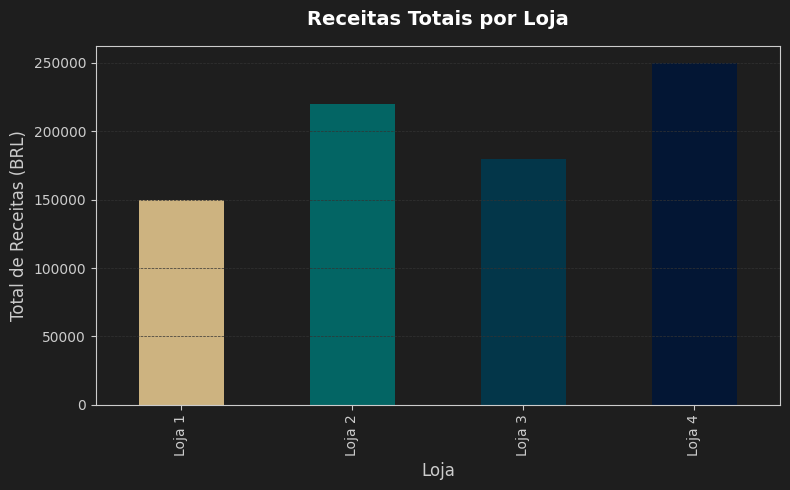

In [66]:
import matplotlib.pyplot as plt

import pandas as pd

faturamento_data = {'Loja 1': 150000, 'Loja 2': 220000, 'Loja 3': 180000, 'Loja 4': 250000}
receitas_totais = pd.Series(faturamento_data)
# Definir estilo VS Code Dark
plt.style.use('dark_background')
plt.rcParams.update({
    'axes.facecolor': '#1e1e1e',
    'figure.facecolor': '#1e1e1e',
    'axes.edgecolor': '#cccccc',
    'axes.labelcolor': '#cccccc',
    'xtick.color': '#cccccc',
    'ytick.color': '#cccccc',
    'grid.color': '#333333',
    'text.color': '#ffffff',
    'axes.titleweight': 'bold',
    'axes.titlepad': 15,
    'axes.titlesize': 14,
    'axes.labelsize': 12
})

# Paleta personalizada
colors = ['#cdb380', '#036564', '#033649', '#031634']

# 1. Barra vertical: Total de receitas
plt.figure(figsize=(8,5))
receitas_totais.plot(kind='bar', color=colors)
plt.title('Receitas Totais por Loja')
plt.ylabel('Total de Receitas (BRL)')
plt.xlabel('Loja')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [67]:
from collections import defaultdict
from urllib.request import urlopen
import csv

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"


# URLs das lojas
urls = [url, url2, url3, url4]

# Função para ler CSV de uma URL
def ler_csv(url):
    with urlopen(url) as resposta:
        linhas = resposta.read().decode('utf-8').splitlines()
        leitor = csv.DictReader(linhas)
        return [linha for linha in leitor]

# Função para calcular vendas por categoria em uma loja
def calcular_vendas_por_categoria(dados_loja):
    categorias = defaultdict(float)  # Defaultdict para evitar a verificação de chave
    for venda in dados_loja:
        categoria = venda['Categoria do Produto']
        preco = float(venda['Preço'])
        quantidade = int(venda['Quantidade de parcelas'])
        valor_venda = preco * quantidade
        categorias[categoria] += valor_venda
    return categorias

# Função principal para processar as vendas de todas as lojas
def processar_vendas(urls):
    vendas_por_categoria = defaultdict(float)

    # Processar todas as lojas
    for i, url in enumerate(urls):
        dados_loja = ler_csv(url)
        print(f"\nVendas por categoria na Loja {i+1}:")

        # Vendas por categoria para a loja atual
        categorias_loja = calcular_vendas_por_categoria(dados_loja)

        for categoria, valor in categorias_loja.items():
            print(f"  {categoria}: R${valor:.2f}")

        # Atualizar o dicionário geral
        for categoria, valor in categorias_loja.items():
            vendas_por_categoria[categoria] += valor

    # Exibir as vendas totais por categoria
    print("\nVendas totais por categoria (todas as lojas):")
    for categoria, valor in vendas_por_categoria.items():
        print(f"  {categoria}: R${valor:.2f}")

    # Calcular o total geral
    total_geral = sum(vendas_por_categoria.values())
    print(f"\nTotal geral de vendas: R${total_geral:.2f}")

# Chamada da função principal
processar_vendas(urls)


Vendas por categoria na Loja 1:
  eletronicos: R$1720525.18
  moveis: R$777243.14
  brinquedos: R$65412.04
  eletrodomesticos: R$1376501.27
  utilidades domesticas: R$51092.72
  esporte e lazer: R$169179.18
  livros: R$34360.24
  instrumentos musicais: R$369322.34

Vendas por categoria na Loja 2:
  moveis: R$703108.03
  instrumentos musicais: R$392599.48
  esporte e lazer: R$108879.57
  eletronicos: R$1715519.72
  utilidades domesticas: R$56984.93
  brinquedos: R$62300.37
  eletrodomesticos: R$1368304.66
  livros: R$41887.42

Vendas por categoria na Loja 3:
  eletrodomesticos: R$1441845.38
  moveis: R$740123.50
  instrumentos musicais: R$333781.40
  esporte e lazer: R$164527.29
  eletronicos: R$1468443.69
  brinquedos: R$81591.72
  utilidades domesticas: R$59635.75
  livros: R$35142.69

Vendas por categoria na Loja 4:
  eletrodomesticos: R$1172119.35
  moveis: R$742172.64
  esporte e lazer: R$133411.27
  livros: R$39390.51
  eletronicos: R$1615256.00
  instrumentos musicais: R$297117.

<ipython-input-82-82a913c239a4>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorias, y=valores, palette='viridis')  # Usando a paleta 'viridis'


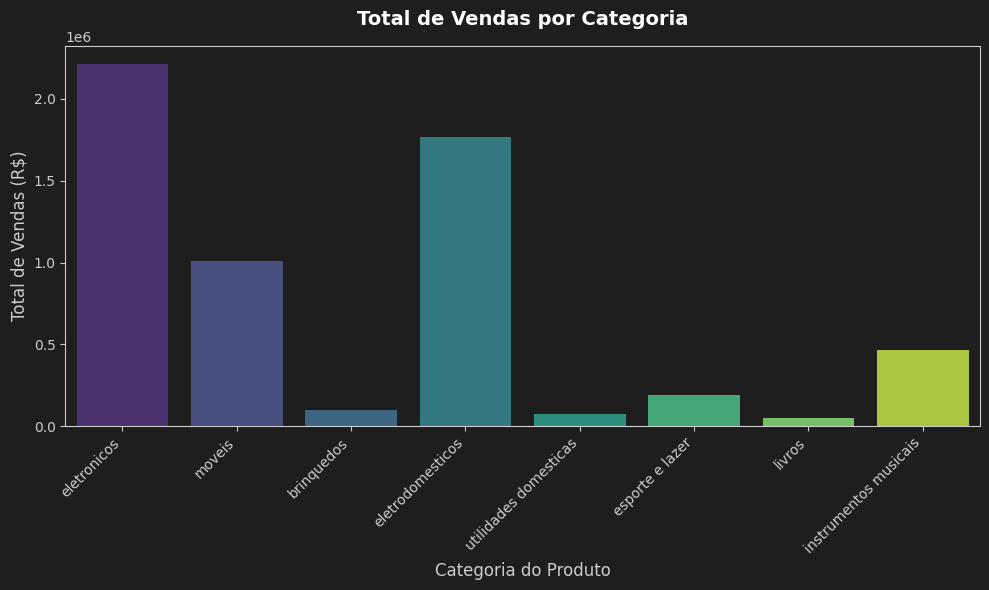

In [82]:
from collections import defaultdict
from urllib.request import urlopen
import csv
import matplotlib.pyplot as plt
import seaborn as sns  # Importar seaborn

# URLs das lojas
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
urls = [url, url2, url3, url4]

# Função para ler CSV de uma URL
def ler_csv(url):
    with urlopen(url) as resposta:
        linhas = resposta.read().decode('utf-8').splitlines()
        leitor = csv.DictReader(linhas)
        return [linha for linha in leitor]

# Função para calcular vendas por categoria em uma loja
def calcular_vendas_por_categoria(dados_loja):
    categorias = defaultdict(float)
    for venda in dados_loja:
        categoria = venda['Categoria do Produto']
        preco = float(venda['Preço'])
        # quantidade = int(venda['Quantidade de parcelas'])  # Comentado
        # valor_venda = preco * quantidade                    # Comentado
        valor_venda = preco  # Usando apenas o preço
        categorias[categoria] += valor_venda
    return categorias

# Função principal para processar as vendas de todas as lojas
def processar_vendas(urls):
    vendas_por_categoria = defaultdict(float)

    # Processar todas as lojas
    for i, url in enumerate(urls):
        dados_loja = ler_csv(url)
        # print(f"\nVendas por categoria na Loja {i+1}:")  # Comentado para simplificar

        # Vendas por categoria para a loja atual
        categorias_loja = calcular_vendas_por_categoria(dados_loja)

        # Atualizar o dicionário geral
        for categoria, valor in categorias_loja.items():
            vendas_por_categoria[categoria] += valor

    # # Exibir as vendas totais por categoria
    # print("\nVendas totais por categoria (todas as lojas):") # Comentado para simplificar
    # for categoria, valor in vendas_por_categoria.items():
    #     print(f"  {categoria}: R${valor:.2f}")

    # # Calcular o total geral
    # total_geral = sum(vendas_por_categoria.values())
    # print(f"\nTotal geral de vendas: R${total_geral:.2f}")

    return vendas_por_categoria  # Retornar as vendas por categoria

# Chamada da função principal
vendas_por_categoria = processar_vendas(urls)

# Preparar dados para o gráfico
categorias = list(vendas_por_categoria.keys())
valores = list(vendas_por_categoria.values())

# Criar o gráfico de barras com uma paleta de cores diferente
plt.figure(figsize=(10, 6))
sns.barplot(x=categorias, y=valores, palette='viridis')  # Usando a paleta 'viridis'
plt.xlabel("Categoria do Produto")
plt.ylabel("Total de Vendas (R$)")
plt.title("Total de Vendas por Categoria")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [68]:
def ler_csv(url):
    dados = []
    with urlopen(url) as resposta:
        # Decodificar os dados
        linhas = resposta.read().decode('utf-8').splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    return dados

# Calcular a avaliação média para cada loja
for i, url in enumerate(urls):
    dados_loja = ler_csv(url)

    # Variáveis para calcular a média
    soma_avaliacoes = 0
    quantidade_produtos = 0

    for produto in dados_loja:
        try:
            # Tentamos com diferentes possíveis nomes de coluna
            if 'Avaliação da compra' in produto:
                avaliacao = float(produto['Avaliação da compra'])
            elif 'Avaliação da compra' in produto:
                avaliacao = float(produto['Avaliação da compra'])
            elif 'Avaliação da compra' in produto:
                avaliacao = float(produto['Avaliação da compra'])
            else:
                # Se não encontramos a coluna, imprimimos as chaves disponíveis
                print(f"Chaves disponíveis na loja {i+1}:", produto.keys())
                raise KeyError("Não encontramos a coluna de avaliação")

            soma_avaliacoes += avaliacao
            quantidade_produtos += 1
        except (ValueError, KeyError) as e:
            if isinstance(e, KeyError):
                raise
            # Ignoramos valores que não podem ser convertidos para float
            continue

    if quantidade_produtos > 0:
        avaliacao_media = soma_avaliacoes / quantidade_produtos
        print(f"Avaliação média da Loja {i+1}: {avaliacao_media:.2f}")
    else:
        print(f"Não foi possível processar as avaliações para a Loja {i+1}")

Avaliação média da Loja 1: 3.98
Avaliação média da Loja 2: 4.04
Avaliação média da Loja 3: 4.05
Avaliação média da Loja 4: 4.00


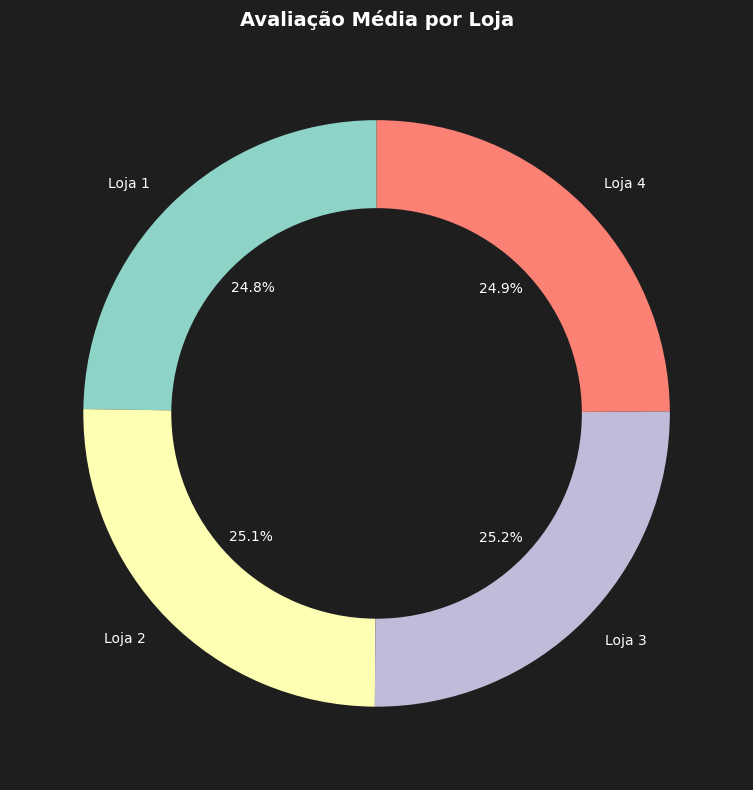

In [83]:
from collections import defaultdict
from urllib.request import urlopen
import csv
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# URLs das lojas
urls = [url, url2, url3, url4]

# Função para ler CSV de uma URL
def ler_csv(url):
    dados = []
    with urlopen(url) as resposta:
        linhas = resposta.read().decode('utf-8').splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    return dados

# Função para calcular a avaliação média para cada loja
def calcular_avaliacao_media(dados_loja, i):
    soma_avaliacoes = 0
    quantidade_produtos = 0
    avaliacao_coluna = None

    # Tentar encontrar a coluna de avaliação com diferentes nomes
    possiveis_colunas_avaliacao = ['Avaliação da compra', 'Avaliaçao da compra', 'Avaliação', 'Avaliacao']
    for coluna in possiveis_colunas_avaliacao:
        if coluna in dados_loja[0]:  # Verificar se a coluna existe no cabeçalho
            avaliacao_coluna = coluna
            break

    if avaliacao_coluna:
        for produto in dados_loja:
            try:
                avaliacao = float(produto[avaliacao_coluna])
                soma_avaliacoes += avaliacao
                quantidade_produtos += 1
            except ValueError:
                # Ignoramos valores que não podem ser convertidos para float
                continue
    else:
        # Se não encontramos a coluna, imprimimos as chaves disponíveis
        if dados_loja:
            print(f"Chaves disponíveis na loja {i+1}:", dados_loja[0].keys())
        else:
            print(f"Não foram encontrados dados para a Loja {i+1}")
        return None  # Retornar None se não houver avaliação

    if quantidade_produtos > 0:
        return soma_avaliacoes / quantidade_produtos
    else:
        print(f"Não foi possível processar as avaliações para a Loja {i+1}")
        return None  # Retornar None se não houver avaliação

# Processar todas as lojas e coletar as avaliações médias
avaliacoes_medias = []
nomes_lojas = []

for i, url in enumerate(urls):
    dados_loja = ler_csv(url)
    avaliacao_media = calcular_avaliacao_media(dados_loja, i + 1)  # Passar o índice da loja
    if avaliacao_media is not None:
        avaliacoes_medias.append(avaliacao_media)
        nomes_lojas.append(f"Loja {i + 1}")

# Criar o gráfico de rosca
plt.figure(figsize=(8, 8))  # Tornar a figura quadrada para o gráfico de rosca
plt.pie(avaliacoes_medias, labels=nomes_lojas, autopct='%1.1f%%', startangle=90,
        wedgeprops={'width': 0.3})  # Ajustar a largura da rosca com wedgeprops
plt.title("Avaliação Média por Loja")
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [74]:
import pandas as pd

# Ler todos os CSVs e adicionar uma coluna 'Loja'
df_total = pd.concat(
    [pd.read_csv(url).assign(Loja=f"Loja {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

# Garantir os tipos corretos
df_total['Preço'] = df_total['Preço'].astype(float)
df_total['Quantidade de parcelas'] = df_total['Quantidade de parcelas'].astype(int)

# A receita é simplesmente o Preço (não multiplicamos pela quantidade de parcelas)
df_total['Receita'] = df_total['Preço']

# Agrupar por Loja e Produto somando a receita
vendas = df_total.groupby(['Loja', 'Produto'])['Receita'].sum().reset_index()

# Função para mostrar os 3 produtos que mais e menos dinheiro geraram
def top_produtos(loja):
    dados = vendas[vendas['Loja'] == loja]

    # Ordenação e seleção dos top produtos
    top_mais_vendidos = dados.nlargest(3, 'Receita')
    top_menos_vendidos = dados.nsmallest(3, 'Receita')

    # Exibição dos resultados
    print(f"\n{loja} - TOP 3 produtos que MAIS dinheiro geraram:")
    for _, linha in top_mais_vendidos.iterrows():
        print(f"  {linha['Produto']} - Receita: R${linha['Receita']:.2f}")

    print(f"\n{loja} - TOP 3 produtos que MENOS dinheiro geraram:")
    for _, linha in top_menos_vendidos.iterrows():
        print(f"  {linha['Produto']} - Receita: R${linha['Receita']:.2f}")

# Mostrar resultados para cada loja
for loja in vendas['Loja'].unique():
    top_produtos(loja)


Loja 1 - TOP 3 produtos que MAIS dinheiro geraram:
  TV Led UHD 4K - Receita: R$189534.28
  Geladeira - Receita: R$149524.28
  Celular Plus X42 - Receita: R$130536.40

Loja 1 - TOP 3 produtos que MENOS dinheiro geraram:
  Corda de pular - Receita: R$870.89
  Dinossauro Rex - Receita: R$918.40
  Cubo mágico 8x8 - Receita: R$929.27

Loja 2 - TOP 3 produtos que MAIS dinheiro geraram:
  Celular Plus X42 - Receita: R$150967.83
  TV Led UHD 4K - Receita: R$137833.06
  Geladeira - Receita: R$130176.48

Loja 2 - TOP 3 produtos que MENOS dinheiro geraram:
  Cubo mágico 8x8 - Receita: R$858.22
  Dinossauro Rex - Receita: R$1027.41
  Corda de pular - Receita: R$1142.54

Loja 3 - TOP 3 produtos que MAIS dinheiro geraram:
  Geladeira - Receita: R$133185.99
  TV Led UHD 4K - Receita: R$128892.11
  Celular Plus X42 - Receita: R$124300.84

Loja 3 - TOP 3 produtos que MENOS dinheiro geraram:
  Cubo mágico 8x8 - Receita: R$853.81
  Dinossauro Rex - Receita: R$1060.78
  Corda de pular - Receita: R$1137.


Loja 1 - TOP 3 produtos que MAIS dinheiro geraram:
  TV Led UHD 4K - Receita: R$189534.28
  Geladeira - Receita: R$149524.28
  Celular Plus X42 - Receita: R$130536.40

Loja 1 - TOP 3 produtos que MENOS dinheiro geraram:
  Corda de pular - Receita: R$870.89
  Dinossauro Rex - Receita: R$918.40
  Cubo mágico 8x8 - Receita: R$929.27


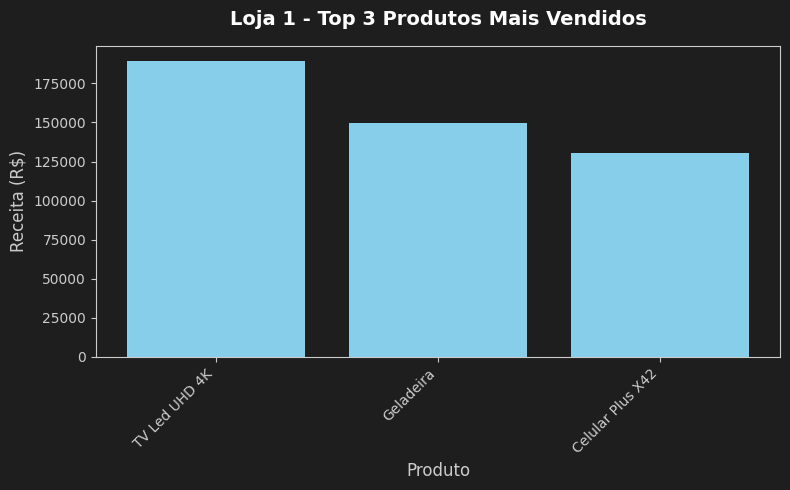

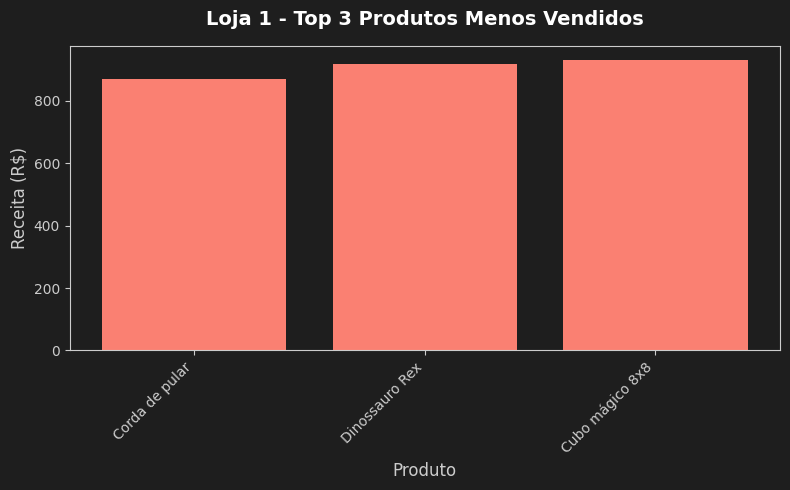


Loja 2 - TOP 3 produtos que MAIS dinheiro geraram:
  Celular Plus X42 - Receita: R$150967.83
  TV Led UHD 4K - Receita: R$137833.06
  Geladeira - Receita: R$130176.48

Loja 2 - TOP 3 produtos que MENOS dinheiro geraram:
  Cubo mágico 8x8 - Receita: R$858.22
  Dinossauro Rex - Receita: R$1027.41
  Corda de pular - Receita: R$1142.54


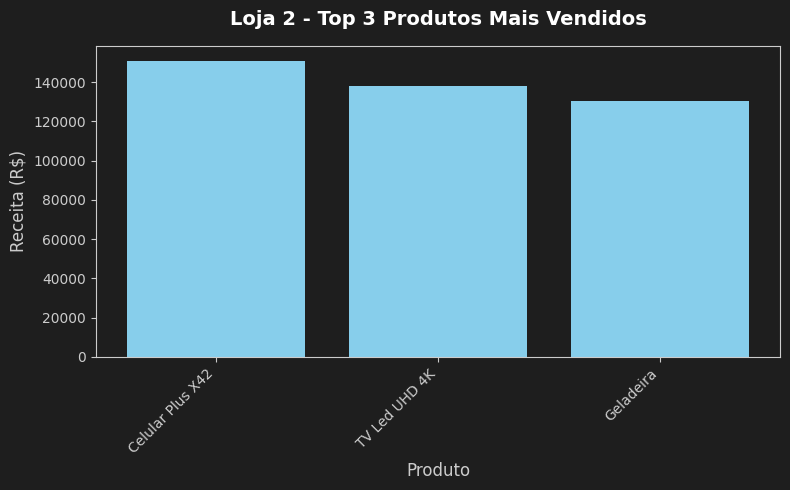

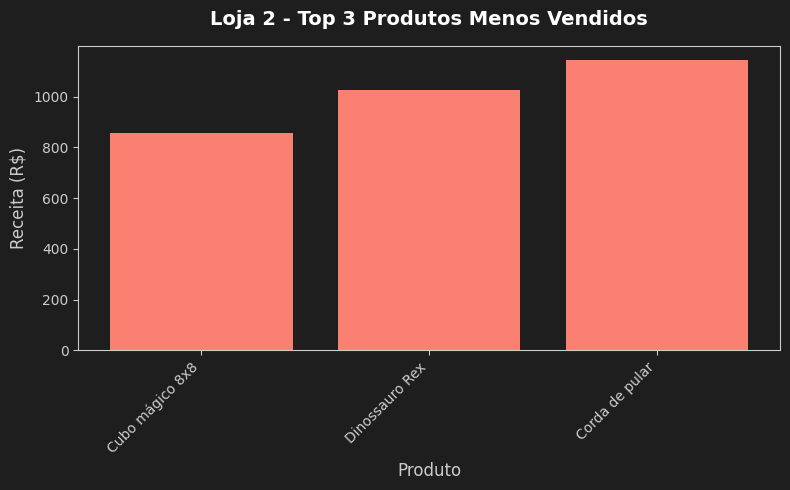


Loja 3 - TOP 3 produtos que MAIS dinheiro geraram:
  Geladeira - Receita: R$133185.99
  TV Led UHD 4K - Receita: R$128892.11
  Celular Plus X42 - Receita: R$124300.84

Loja 3 - TOP 3 produtos que MENOS dinheiro geraram:
  Cubo mágico 8x8 - Receita: R$853.81
  Dinossauro Rex - Receita: R$1060.78
  Corda de pular - Receita: R$1137.76


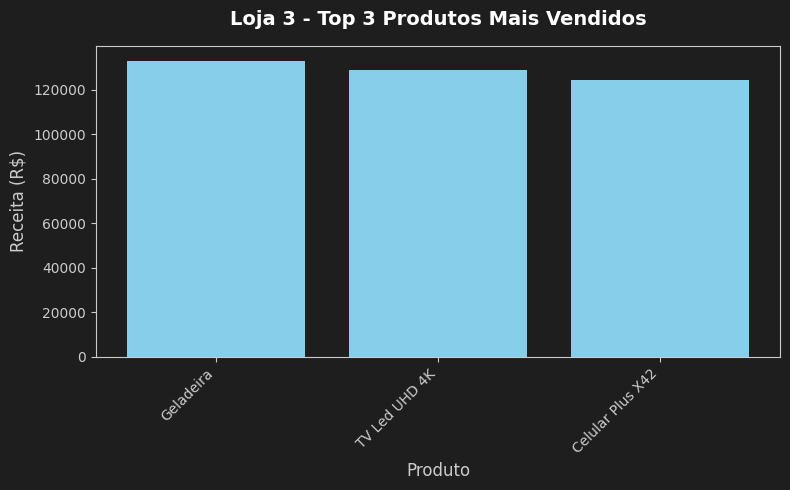

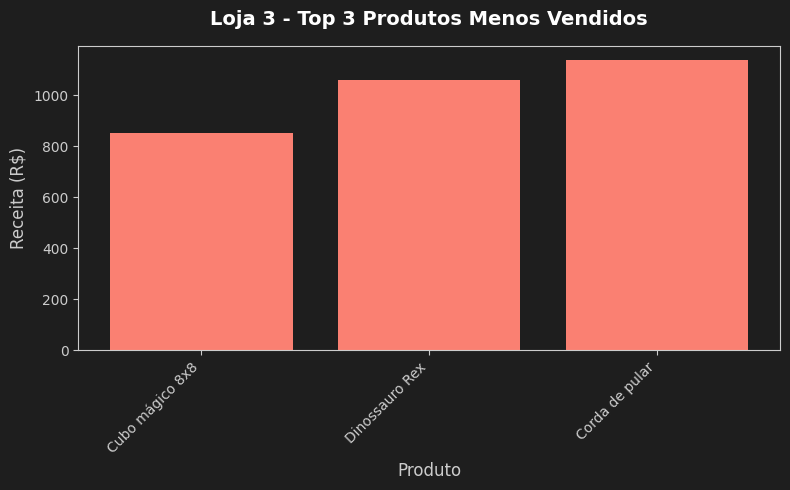


Loja 4 - TOP 3 produtos que MAIS dinheiro geraram:
  Celular Plus X42 - Receita: R$128930.07
  TV Led UHD 4K - Receita: R$120393.25
  Smart TV - Receita: R$110387.57

Loja 4 - TOP 3 produtos que MENOS dinheiro geraram:
  Corda de pular - Receita: R$939.74
  Cubo mágico 8x8 - Receita: R$997.38
  Dinossauro Rex - Receita: R$1143.94


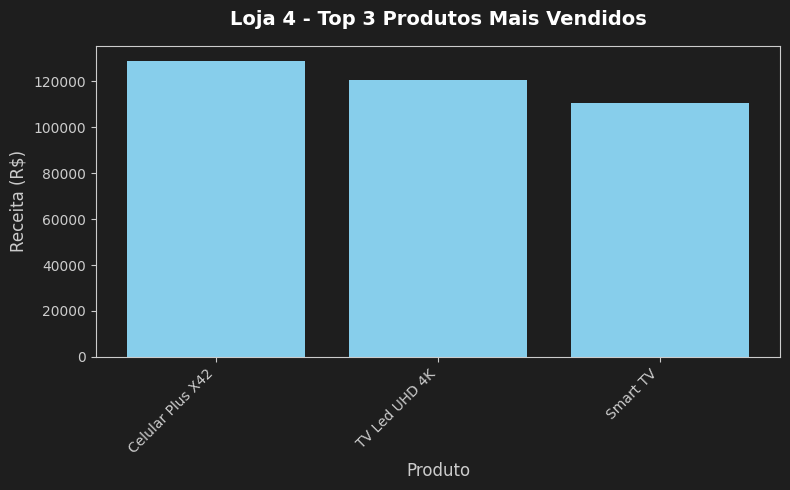

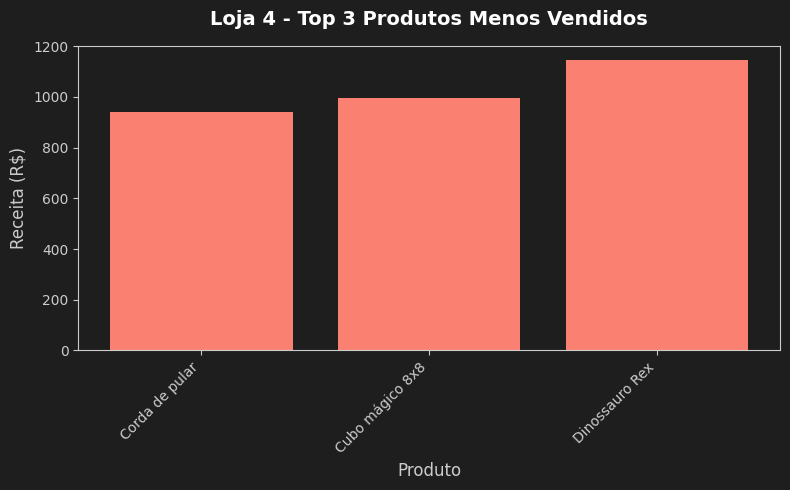

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Ler todos os CSVs e adicionar uma coluna 'Loja'
df_total = pd.concat(
    [pd.read_csv(url).assign(Loja=f"Loja {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

# Garantir os tipos corretos
df_total['Preço'] = df_total['Preço'].astype(float)
df_total['Quantidade de parcelas'] = df_total['Quantidade de parcelas'].astype(int)

# A receita é simplesmente o Preço (não multiplicamos pela quantidade de parcelas)
df_total['Receita'] = df_total['Preço']

# Agrupar por Loja e Produto somando a receita
vendas = df_total.groupby(['Loja', 'Produto'])['Receita'].sum().reset_index()


# Função para mostrar os 3 produtos que mais e menos dinheiro geraram E gerar gráficos
def top_produtos(loja, vendas):
    dados = vendas[vendas['Loja'] == loja]

    # Ordenação e seleção dos top produtos
    top_mais_vendidos = dados.nlargest(3, 'Receita')
    top_menos_vendidos = dados.nsmallest(3, 'Receita')

    # Exibição dos resultados
    print(f"\n{loja} - TOP 3 produtos que MAIS dinheiro geraram:")
    for _, linha in top_mais_vendidos.iterrows():
        print(f"  {linha['Produto']} - Receita: R${linha['Receita']:.2f}")

    print(f"\n{loja} - TOP 3 produtos que MENOS dinheiro geraram:")
    for _, linha in top_menos_vendidos.iterrows():
        print(f"  {linha['Produto']} - Receita: R${linha['Receita']:.2f}")

    # --- Criação dos gráficos ---

    # Gráfico de Barras - Mais Vendidos
    plt.figure(figsize=(8, 5))
    plt.bar(top_mais_vendidos['Produto'], top_mais_vendidos['Receita'], color='skyblue')  # Mudança de cor
    plt.xlabel('Produto')
    plt.ylabel('Receita (R$)')
    plt.title(f'{loja} - Top 3 Produtos Mais Vendidos')
    plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x
    plt.tight_layout()
    plt.show()

    # Gráfico de Barras - Menos Vendidos
    plt.figure(figsize=(8, 5))
    plt.bar(top_menos_vendidos['Produto'], top_menos_vendidos['Receita'], color='salmon')  # Mudança de cor
    plt.xlabel('Produto')
    plt.ylabel('Receita (R$)')
    plt.title(f'{loja} - Top 3 Produtos Menos Vendidos')
    plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x
    plt.tight_layout()
    plt.show()


# Mostrar resultados para cada loja
for loja in vendas['Loja'].unique():
    top_produtos(loja, vendas)  # Passa o DataFrame 'vendas' para a função

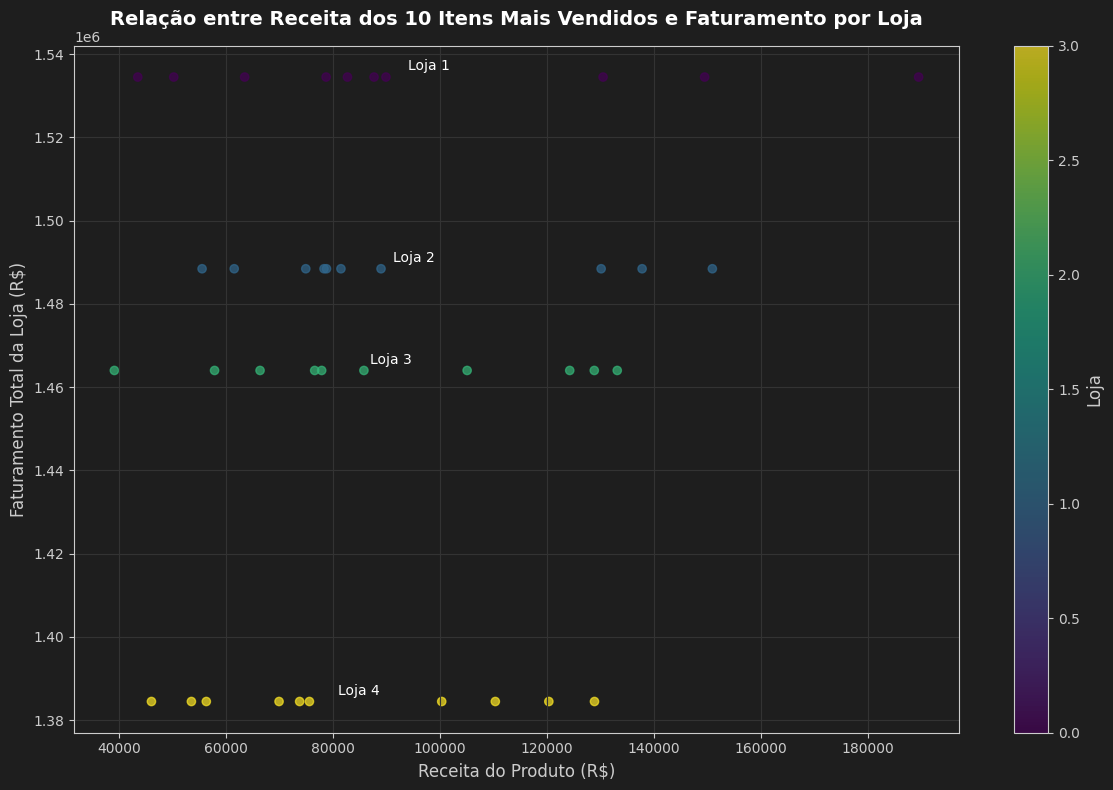

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Ler todos os CSVs e adicionar uma coluna 'Loja'
df_total = pd.concat(
    [pd.read_csv(url).assign(Loja=f"Loja {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

# Garantir os tipos corretos
df_total['Preço'] = df_total['Preço'].astype(float)
df_total['Quantidade de parcelas'] = df_total['Quantidade de parcelas'].astype(int)

# A receita é simplesmente o Preço (não multiplicamos pela quantidade de parcelas)
df_total['Receita'] = df_total['Preço']

# Agrupar por Loja e Produto somando a receita
vendas = df_total.groupby(['Loja', 'Produto'])['Receita'].sum().reset_index()

# Função para gerar o gráfico de dispersão
def gerar_grafico_dispersao_top_10(vendas):
    # Calcular o faturamento total por loja
    faturamento_por_loja = vendas.groupby('Loja')['Receita'].sum().reset_index()

    # Calcular os 10 itens mais vendidos (em todas as lojas)
    top_10_produtos = vendas.groupby('Produto')['Receita'].sum().nlargest(10).index.tolist()

    # Filtrar os dados para incluir apenas os 10 itens mais vendidos
    vendas_top_10 = vendas[vendas['Produto'].isin(top_10_produtos)]

    # Mesclar os dados de vendas dos top 10 produtos com o faturamento total por loja
    dados_grafico = pd.merge(vendas_top_10, faturamento_por_loja, on='Loja')

    # Criar o gráfico de dispersão
    plt.figure(figsize=(12, 8))
    plt.scatter(dados_grafico['Receita_x'], dados_grafico['Receita_y'], c=dados_grafico['Loja'].astype('category').cat.codes, cmap='viridis', alpha=0.7)
    plt.xlabel('Receita do Produto (R$)')
    plt.ylabel('Faturamento Total da Loja (R$)')
    plt.title('Relação entre Receita dos 10 Itens Mais Vendidos e Faturamento por Loja')

    # Adicionar rótulos para as lojas
    for i, loja in enumerate(dados_grafico['Loja'].unique()):
        x_media = dados_grafico[dados_grafico['Loja'] == loja]['Receita_x'].mean()
        y_media = dados_grafico[dados_grafico['Loja'] == loja]['Receita_y'].mean()
        plt.annotate(loja, (x_media, y_media), textcoords="offset points", xytext=(5,5), ha='center')

    plt.colorbar(label='Loja')  # Adicionar legenda de cores
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Gerar o gráfico de dispersão
gerar_grafico_dispersao_top_10(vendas)

# 5. Frete Médio por Loja


In [78]:
# Agrupar por loja e calcular a média do custo de envio
envio_medio = df_total.groupby('Loja')['Frete'].mean().round(2)

# Mostrar resultados
print("\nEnvio médio por loja:")
for loja, medio in envio_medio.items():
    print(f"{loja}: R${medio}")


Envio médio por loja:
Loja 1: R$34.69
Loja 2: R$33.62
Loja 3: R$33.07
Loja 4: R$31.28


<ipython-input-81-16f24188fd08>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loja', y='Avaliação Média', data=df_avaliacoes, palette=paleta_de_cores)


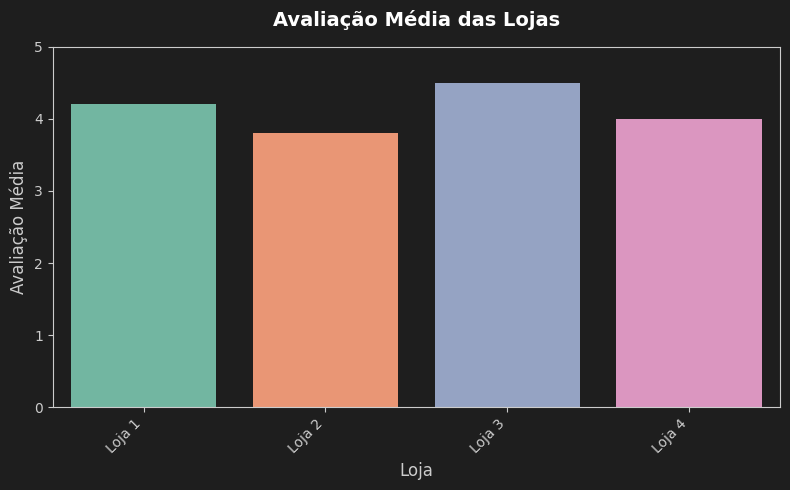

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Importar a biblioteca seaborn para paletas de cores

# Exemplo de DataFrame com as avaliações médias (substitua com seus dados reais)
data = {'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
        'Avaliação Média': [4.2, 3.8, 4.5, 4.0]}
df_avaliacoes = pd.DataFrame(data)

# Escolha uma paleta de cores do seaborn (veja a lista abaixo)
# paleta_de_cores = 'viridis'
# paleta_de_cores = 'plasma'
paleta_de_cores = 'Set2'
# paleta_de_cores = 'coolwarm'

# Criar o gráfico de barras com a paleta de cores escolhida
plt.figure(figsize=(8, 5))
sns.barplot(x='Loja', y='Avaliação Média', data=df_avaliacoes, palette=paleta_de_cores)
plt.xlabel('Loja')
plt.ylabel('Avaliação Média')
plt.title('Avaliação Média das Lojas')
plt.ylim(0, 5)  # Assumindo escala de avaliação de 0 a 5
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

